In [1]:
%%capture
!pip install datasets
!pip install --upgrade arabic-reshaper
!pip install python-bidi
!pip install git+https://github.com/ARBML/tnkeeh.git
!pip install git+https://github.com/ARBML/tkseem.git

##We choose fixed 3 as fixed 4 is only prepared for meter classification

In [2]:
import pandas as pd
import json
import datasets
ashaar = datasets.load_dataset('MagedSaeed/ashaar')

Downloading:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

Using custom data configuration MagedSaeed--ashaar-26ef147565bd1165


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/MagedSaeed___parquet/MagedSaeed--ashaar-26ef147565bd1165/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
df = ashaar['train'].to_pandas()
df

,poem title,poem meter,poem verses,poem theme,poem url,poet name,poet description,poet url,poet era,poet location,poem description,poem language type
0,أصبح الملك للذي فطر الخلق,بحر الخفيف,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",قصيدة دينية,https://www.aldiwan.net/poem16182.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
1,من أي مولى ارتجي,بحر مجزوء الرمل,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",قصيدة دينية,https://www.aldiwan.net/poem16183.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
2,العبد عبدك يا من أنت سيده,بحر البسيط,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",قصيدة ذم,https://www.aldiwan.net/poem16184.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
3,لو كنت أطمع بالمنام توهما,بحر الكامل,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",قصيدة عامه,https://www.aldiwan.net/poem16185.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
4,يعد علي أنفاسي ذنوبا,بحر الوافر,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",قصيدة عامه,https://www.aldiwan.net/poem16186.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
254625,None,المضارع,"[وعندنا ليس محض, إلى الشرق أن تولي]",None,None,dataset collectors,None,None,None,None,None,فصيح
254626,None,المضارع,"[من الليالي نهار, ومن عتمها ضياء]",None,None,dataset collectors,None,None,None,None,None,فصيح
254627,None,المضارع,"[مقامه إذ تجلى, وفي البيد إذ تحلى]",None,None,dataset collectors,None,None,None,None,None,فصيح
254628,None,المضارع,"[على بابك انتظرنا, وفي البال ألف حيلة, من الوص...",None,None,dataset collectors,None,None,None,None,None,فصيح


In [4]:
# always work on a copy :)
df_copy = df.copy(deep=True)
df_copy['poem count'] = df_copy['poem verses'].apply(lambda poem: len(poem)/2)
df_copy['poem verses str'] = df_copy['poem verses'].apply(lambda verses: ' '.join(verse for verse in verses))
len(df_copy)

254630

In [5]:
df_copy

,poem title,poem meter,poem verses,poem theme,poem url,poet name,poet description,poet url,poet era,poet location,poem description,poem language type,poem count,poem verses str
0,أصبح الملك للذي فطر الخلق,بحر الخفيف,"[أَصبَحَ المُلك لِلَّذي فَطر الخَل, قَ بِتَقدي...",قصيدة دينية,https://www.aldiwan.net/poem16182.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,10.0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...
1,من أي مولى ارتجي,بحر مجزوء الرمل,"[مِن أَي مَولى اِرتَجي, وَلاي باب التَجي, وَال...",قصيدة دينية,https://www.aldiwan.net/poem16183.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,15.0,مِن أَي مَولى اِرتَجي وَلاي باب التَجي وَاللَه...
2,العبد عبدك يا من أنت سيده,بحر البسيط,"[العَبد عَبدك يا مَن أَنتَ سَيدهُ, وَلَيسَ غَي...",قصيدة ذم,https://www.aldiwan.net/poem16184.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,12.5,العَبد عَبدك يا مَن أَنتَ سَيدهُ وَلَيسَ غَيرك...
3,لو كنت أطمع بالمنام توهما,بحر الكامل,"[لَو كُنتَ أَطمَع بِالمَنام تَوهما, لَسالَت طَ...",قصيدة عامه,https://www.aldiwan.net/poem16185.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,27.0,لَو كُنتَ أَطمَع بِالمَنام تَوهما لَسالَت طَيف...
4,يعد علي أنفاسي ذنوبا,بحر الوافر,"[يعد عَليَّ أَنفاسي ذُنوباً, إِذا ما قُلت أَفد...",قصيدة عامه,https://www.aldiwan.net/poem16186.html,الامير منجك باشا,منجك بن محمد بن منجك بن ابي بكر بن عبد القادر ...,https://www.aldiwan.net/cat-poet-alamir-mnczyk...,العصر العثماني,None,None,None,21.0,يعد عَليَّ أَنفاسي ذُنوباً إِذا ما قُلت أَفديه...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254625,None,المضارع,"[وعندنا ليس محض, إلى الشرق أن تولي]",None,None,dataset collectors,None,None,None,None,None,فصيح,1.0,وعندنا ليس محض إلى الشرق أن تولي
254626,None,المضارع,"[من الليالي نهار, ومن عتمها ضياء]",None,None,dataset collectors,None,None,None,None,None,فصيح,1.0,من الليالي نهار ومن عتمها ضياء
254627,None,المضارع,"[مقامه إذ تجلى, وفي البيد إذ تحلى]",None,None,dataset collectors,None,None,None,None,None,فصيح,1.0,مقامه إذ تجلى وفي البيد إذ تحلى
254628,None,المضارع,"[على بابك انتظرنا, وفي البال ألف حيلة, من الوص...",None,None,dataset collectors,None,None,None,None,None,فصيح,2.0,على بابك انتظرنا وفي البال ألف حيلة من الوصل ل...


In [6]:
has_era_df = df_copy.dropna(subset=['poet era'])

In [7]:
has_era_df['poet era'].value_counts()

العصر الحديث        55137
العصر العباسي       30413
العصر المملوكي      19059
العصر العثماني      11872
المغرب والأندلس      6614
العصر الفاطمي        4939
العصر الأندلسي       4770
العصر الأموي         3958
العصر الأيوبي        3125
المخضرمين            1975
العصر الجاهلي        1873
قبل الإسلام          1786
عصر بين الدولتين     1416
العصر الإسلامي        484
Name: poet era, dtype: int64

### Export era dataset

العصور:


| First Header  | Second Header |
| ------------- | ------------- |
| 41 - 132 هـ  | العصر الأموي  |
| 123-232 هـ  | العصر العباسي  |
|113-172هـ| العصر الأندلسي|
|358-567 هـ|العصر الفاطمي|
|569 - 626 هـ|العصر الأيوبي |
|648-784 هـ |العصر المملوكي|
|699 - 1200 هـ |العصر العثماني |
|1200 - now هـ |العصر الحديث |


In [8]:
era2labels = {  
  'العصر العباسي' : 1,
  'العصر الفاطمي': 2,
  'العصر الحديث': 3,
  'العصر العثماني' : 3,
  'العصر الجاهلي' :0,
  'العصر الإسلامي' : 0,
  'العصر الأموي': 0,
  'العصر الأيوبي' : 2,
  'قبل الإسلام' : 0,
  'العصر المملوكي' : 2
}


labels2era = [[] for _ in range(len(list(set(era2labels.values()))))]

for era, i in era2labels.items():
  labels2era[i].append(era)
labels2era

[['العصر الجاهلي', 'العصر الإسلامي', 'العصر الأموي', 'قبل الإسلام'],
 ['العصر العباسي'],
 ['العصر الفاطمي', 'العصر الأيوبي', 'العصر المملوكي'],
 ['العصر الحديث', 'العصر العثماني']]

In [9]:
excluded_eras = list(set(has_era_df['poet era']) - set([item for sublist in labels2era for item in sublist])) # قصيدة اعتذار has only three poems :)

has_accepted_era_df = has_era_df[has_era_df['poet era'].apply(lambda era: era not in excluded_eras)]
len(has_accepted_era_df)

132646

In [10]:
has_accepted_era_df['label'] = has_accepted_era_df['poet era'].replace(era2labels)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


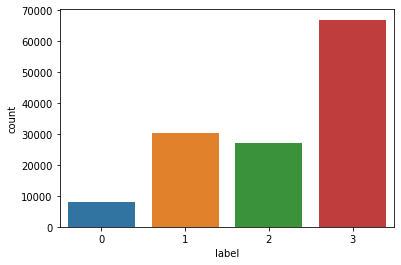

In [11]:
import seaborn as sns
sns.countplot(has_accepted_era_df['label'],orient="v")

In [12]:
def chunkify_poem(verses_list, max_length=3):
  max_length *= 2 # we need baits not shatrs
  return [verses_list[i:i+max_length] for i in range(0, len(verses_list), max_length) if len(verses_list[i:i+max_length]) == max_length]

In [13]:
def preprocess(verse):
    flattened = re.sub(r'[*&^%.$#@!…ـ)()–:،]', '', verse)
    flattened = re.sub(r'[0-9]', '', flattened)
    flattened = re.sub(r' +', ' ', flattened).strip()
    return flattened

def chunkify_long_poems(verses_list, max_length=64):
  tokens = ' '.join([preprocess(verse) for verse in verses_list]).split(' ')
  return [' '.join(tokens[i*max_length: (i+1)*max_length]) for i in range(len(tokens) // max_length + 1)]

In [14]:
import re 
five_baits_rows = list()
chunk_len = 5
max_len = 0 
exc_poems = 0 
for index,row in has_accepted_era_df.iterrows():
  verses = row['poem verses']
  for poem_chunk in chunkify_long_poems(verses):
    five_baits_rows.append({
        'text': poem_chunk,
        'label':row['label'],
        'poet era': row['poet era']
      })
  # break
has_accepted_era_five_baits_df = pd.DataFrame(five_baits_rows)
has_accepted_era_five_baits_df

,text,label,poet era
0,أَصبَحَ المُلك لِلَّذي فَطر الخَل قَ بِتَقديرٍ...,3,العصر العثماني
1,مَدى الدَهر أَخيهِ يَحيى الحصور الكَريمِ أَدرك...,3,العصر العثماني
2,مِن أَي مَولى اِرتَجي وَلاي باب التَجي وَاللَه...,3,العصر العثماني
3,يَلهجِ وَبصنوه عُثمان ذي الن نورَين أَقوم مَنه...,3,العصر العثماني
4,العَبد عَبدك يا مَن أَنتَ سَيدهُ وَلَيسَ غَيرك...,3,العصر العثماني
...,...,...,...
323721,إذا ما صفاك الدهر عيشا مروقا أصابك سهم الدهر س...,3,العصر الحديث
323722,مذ طال في الخطى فجاز سما العلياء سمتا ومرتقى و...,3,العصر الحديث
323723,دعاه اللَه لباه مسرعا فسارع فيما قد دعاه تشوقا...,3,العصر الحديث
323724,مفلقا وينظره طوراً يراه متربا ترائبه قد هشمت ع...,3,العصر الحديث


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


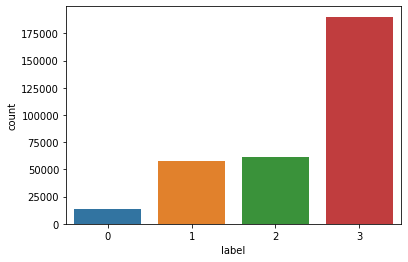

In [15]:
import seaborn as sns
sns.countplot(has_accepted_era_five_baits_df['label'],orient="v")

In [16]:
era2labels

{'العصر الأموي': 0,
 'العصر الأيوبي': 2,
 'العصر الإسلامي': 0,
 'العصر الجاهلي': 0,
 'العصر الحديث': 3,
 'العصر العباسي': 1,
 'العصر العثماني': 3,
 'العصر الفاطمي': 2,
 'العصر المملوكي': 2,
 'قبل الإسلام': 0}

In [ ]:
has_accepted_era_five_baits_df['label'].value_counts().values.min()

13526

In [17]:

sample_amounts = {idx:50_000 if cnt > 50_000 else cnt for idx, cnt in has_accepted_era_five_baits_df['label'].value_counts().iteritems()}
print(sample_amounts)
has_accepted_era_five_baits_df = (
    has_accepted_era_five_baits_df.groupby('label').apply(lambda g: g.sample(
        # lookup number of samples to take
        n=sample_amounts[g.name],
        # enable replacement if len is less than number of samples expected
        replace=False  
    ))
)

{3: 50000, 2: 50000, 1: 50000, 0: 13526}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


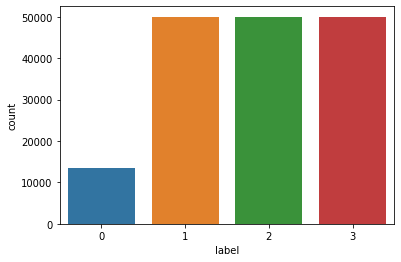

In [18]:
import seaborn as sns
sns.countplot(has_accepted_era_five_baits_df['label'],orient="v")

In [19]:
from sklearn.utils import shuffle
import random

shuffle(has_accepted_era_five_baits_df,  random_state=20).to_json('/content/era_dataset_from_df.json',force_ascii=False,indent=2,orient='records')
json.dump({'data':json.load(open('/content/era_dataset_from_df.json'))},open('/content/era_dataset.json','w'),indent=4,ensure_ascii=False)

In [20]:
!head -10 /content/era_dataset.json

{
    "data": [
        {
            "text": "أقبيصَ لستَ وإن جَهَدتَ ببالغٍ سعيَ ابنِ عمّك في الندى داودِ شتّانَ بينَكَ يا قبيصَ وبينَهُ إن المُذّمَّمَ ليس كالمحمود اختارَ داوود بناء محامِدٍ واختَرتَ أكلَ شبارِقٍ وثريدِ قد كان مجدُ أبيكَ لو أحيَيتَهُ روحٍ أبي خلفٍ كمجد يزيدِ لكِن جرى داوود جريَ مبَرِّز فحَوى المدى وجرَيت جريَ بليدِ داوود محمودٌ وأنت مُذّمَّمٌ عجباً لذاكَ وأنتُما من عودِ ولَرُبَّ عودٍ قد يُشَقُّ لمَسجدٍ نِصفاً",
            "label": 1,
            "poet era": "العصر العباسي"
        },
        {
            "text": "قَبل وصفِهنَّ المِحاقُ ربَّما تَكثُر الأَيادي الجَليلا تُ فَلا تَنفَعُ المَعاني الدِّقاقُ",
            "label": 1,


In [21]:
import tnkeeh as tn 
from datasets import load_dataset
import os 
from transformers import AutoTokenizer
import torch
import copy 
import tkseem as tk

data_args = {
    'segment' : False,
    'remove_special_chars' : False,
    'remove_english' : True
,    'normalize' : False,
    'remove_diacritics' : True
,    'excluded_chars' : []
  ,  'remove_tatweel' : True
,    'remove_html_elements' : False,
    'remove_links' : False, 
    'remove_twitter_meta' : False,
    'remove_long_words' : False,
    'remove_repeated_chars' : False,
}

# more_stop_words = ['وما' , 'فما', 'كنت', 'ولو', 'إلا', 'وإن', 'منك', 'بما', 'وأنت', 'يا', 'لي', 'فلا', 'لنا', 'منهم']
# stop_words = open('/content/list.txt', 'r').read().splitlines() + more_stop_words

def get_tokenizer(tok_name):
    tokenizers = {'SentencePieceTokenizer':tk.SentencePieceTokenizer, 'WordTokenizer':tk.WordTokenizer, 'CharacterTokenizer':tk.CharacterTokenizer,
         'MorphologicalTokenizer':tk.MorphologicalTokenizer, 'RandomTokenizer':tk.RandomTokenizer, 'DisjointLetterTokenizer':tk.DisjointLetterTokenizer}
    return tokenizers[tok_name] 


def split_dataset(dataset, seed = 42):
    #create validation split
    if 'valid' not in dataset:
        train_valid_dataset = dataset['train'].train_test_split(test_size=0.1, seed = seed)
        dataset['valid'] = train_valid_dataset.pop('test')
        dataset['train'] = train_valid_dataset['train']

    #create training split 
    if 'test' not in dataset:
        train_valid_dataset = dataset['train'].train_test_split(test_size=0.1, seed = seed)
        dataset['test'] = train_valid_dataset.pop('test')
        dataset['train'] = train_valid_dataset['train']  
    return dataset 


def clean_dataset(dataset):
    
    cleaner = tn.Tnkeeh(**data_args)
    dataset = cleaner.clean_hf_dataset(dataset, 'text')
    return dataset 

def remove_stop_words(example):
    example['text'] = ' '.join([word for word in example['text'].split(' ') if word not in stop_words])
      
    return example

tokenizer_name = ''
max_tokens = 128
vocab_size  = 10_000

batch_size = 512

# clean and load data
dataset = load_dataset('json',data_files=['/content/era_dataset.json'],field='data')
dataset = clean_dataset(dataset)

dataset = split_dataset(dataset)
# dataset = dataset.map(remove_stop_words)
examples = copy.deepcopy(dataset)


data = []
for sample in dataset['train']:
    data.append(sample['text'])

open(f'/content/data.txt', 'w').write(('\n').join(data))
tokenizer = tk.SentencePieceTokenizer
tokenizer = tokenizer(vocab_size = vocab_size)
tokenizer.train('/content/data.txt')
dataset = dataset.map(lambda examples:{'input_ids': tokenizer.encode_sentences(examples['text'], out_length= max_tokens)}, batched=True)
columns=['input_ids', 'labels'] 
dataset = dataset.map(lambda examples:{'labels': examples['label']}, batched=True)

Using custom data configuration default-e10f05c83f9edbfb


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-e10f05c83f9edbfb/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/163526 [00:00<?, ?ex/s]

Training SentencePiece ...


  0%|          | 0/133 [00:00<?, ?ba/s]

  0%|          | 0/17 [00:00<?, ?ba/s]

  0%|          | 0/15 [00:00<?, ?ba/s]

  0%|          | 0/133 [00:00<?, ?ba/s]

  0%|          | 0/17 [00:00<?, ?ba/s]

  0%|          | 0/15 [00:00<?, ?ba/s]

In [22]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'poet era', 'input_ids', 'labels'],
        num_rows: 132455
    })
    valid: Dataset({
        features: ['text', 'label', 'poet era', 'input_ids', 'labels'],
        num_rows: 16353
    })
    test: Dataset({
        features: ['text', 'label', 'poet era', 'input_ids', 'labels'],
        num_rows: 14718
    })
})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


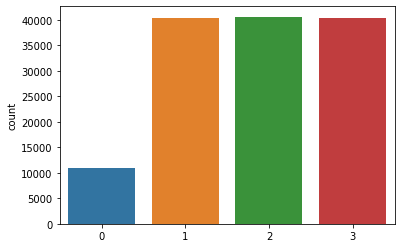

In [23]:
sns.countplot(dataset['train']['label'],orient="v")

In [24]:
from datasets import load_dataset
dt = load_dataset('json',data_files=['/content/era_dataset.json'],field='data')
dt

Using custom data configuration default-e10f05c83f9edbfb
Reusing dataset json (/root/.cache/huggingface/datasets/json/default-e10f05c83f9edbfb/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'poet era'],
        num_rows: 163526
    })
})

In [25]:
import tensorflow as tf
import numpy as np
import os
import time
import glob
from tensorflow.keras.layers import GRU, Embedding, Dense, Input, Dropout, Bidirectional, BatchNormalization, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



def create_model():
  model = Sequential()
  model.add(Input((max_tokens,)))
  model.add(Embedding(10_000, 128))
  model.add(Bidirectional(GRU(units = 64, return_sequences=True, dropout=0.3)))
  model.add(Bidirectional(GRU(units = 64, return_sequences=True, dropout=0.3)))
  model.add(Bidirectional(GRU(units = 64, dropout=0.3)))
  model.add(Dropout(0.3))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(4, activation = 'softmax'))
  model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
  return model


checkpoint_path = "/content/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

callbacks = [tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                 monitor='val_accuracy',
                                                 verbose=1,
                                                 save_weights_only=True,
                                                 save_best_only= True,
                                                 mode='max')]

In [26]:
x_train = np.array(dataset['train']['input_ids'])
y_train = np.array(dataset['train']['labels'])
x_valid = np.array(dataset['valid']['input_ids'])
y_valid = np.array(dataset['valid']['labels'])

In [27]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 128, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128, 128)         74496     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128, 128)         74496     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              74496     
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

In [ ]:
model.fit(x_train, y_train, validation_data = (x_valid, y_valid) ,epochs = 5, shuffle = True, batch_size=128)

In [ ]:
x_test = np.array(dataset['test']['input_ids'])
y_test = np.array(dataset['test']['labels'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


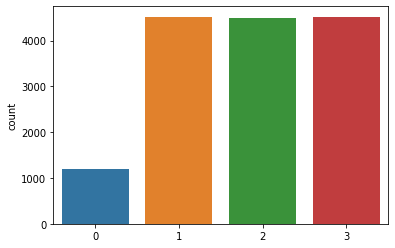

In [ ]:
sns.countplot(y_test)

In [ ]:
model = create_model()
model.load_weights(checkpoint_path)
model.evaluate(x_test, y_test, batch_size = 256)

58/58 [==============================] - 1s 16ms/step - loss: 1.0418 - accuracy: 0.5526


[1.0418223142623901, 0.5525886416435242]

In [ ]:
y_pred = model.predict(x_test, batch_size = 256)

[[ 524  476  113   87]
 [ 202 2854 1043  424]
 [  85 1214 2353  835]
 [  63  802 1241 2402]]


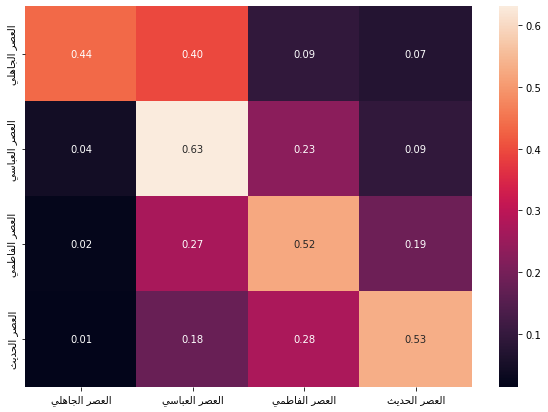

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from bidi.algorithm import get_display
import arabic_reshaper

cm = confusion_matrix(y_test, y_pred.argmax(-1))
print(cm)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
lbls = [get_display(arabic_reshaper.reshape(lbl[0])) for lbl in labels2era]
df_cm = pd.DataFrame(cmn, lbls, lbls)
plt.figure(figsize=(10,7))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='.2f') # font size

plt.show()